In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import parcoords

In [15]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Load the data
archive = pd.read_csv('data/output_data/optimization_archive.csv')
convergence = pd.read_csv('data/output_data/convergence_metrics.csv')

In [16]:
print(archive.columns, archive)

Index(['Unnamed: 0', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1',
       '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1',
       '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Damage Robustness', 'Investment Robustness', 'Deaths Robustness'],
      dtype='object')    Unnamed: 0  0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  \
0           0        0        0        0        1        1        0        0   

   2_RfR 1  2_RfR 2  ...  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
0        0        0  ...                   5                   9   

   A.4_DikeIncrease 

In [17]:
print(convergence)

   Unnamed: 0   nfe  epsilon_progress  hypervolume
0           0     0                 0          0.0
1           1   100                 3          0.0
2           2  1100                 3          0.0
3           3  2199                 3          0.0
4           4  3298                 3          0.0
5           5  4394                 3          0.0
6           6  5485                 3          0.0
7           7  6580                 3          0.0
8           8  7080                 3          0.0


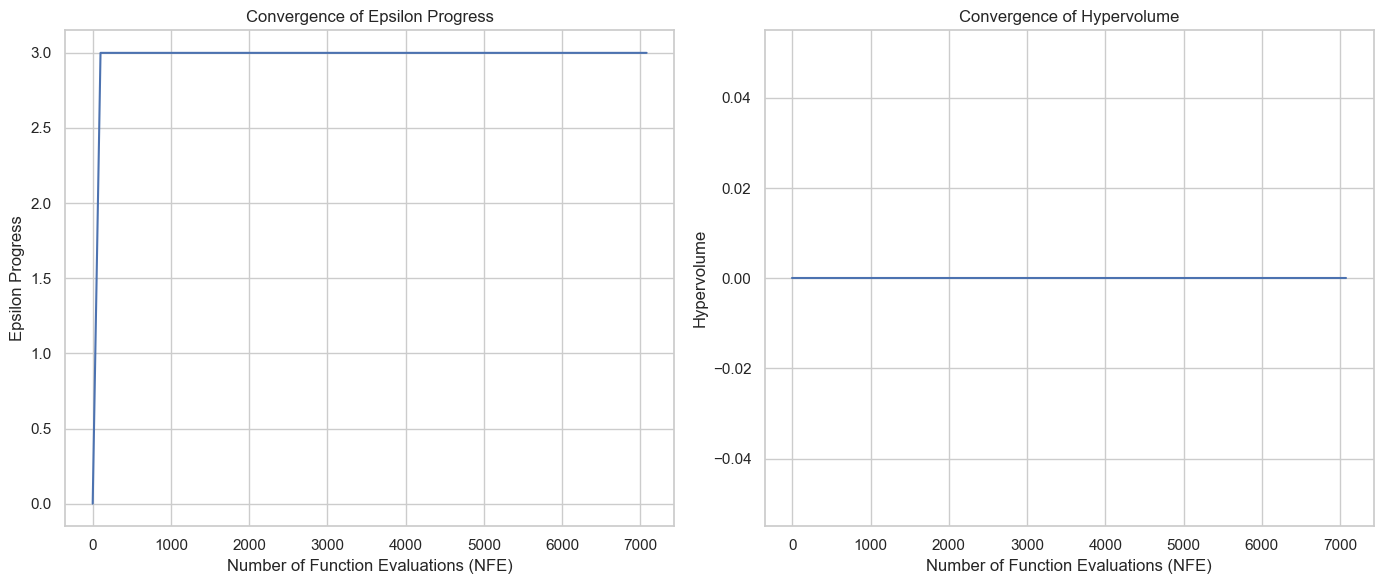

In [18]:
# Plot convergence metrics
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 6))
ax1.plot(convergence['nfe'], convergence['epsilon_progress'])
ax1.set_xlabel('Number of Function Evaluations (NFE)')
ax1.set_ylabel('Epsilon Progress')
ax1.set_title('Convergence of Epsilon Progress')

ax2.plot(convergence['nfe'], convergence['hypervolume'])
ax2.set_xlabel('Number of Function Evaluations (NFE)')
ax2.set_ylabel('Hypervolume')
ax2.set_title('Convergence of Hypervolume')

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

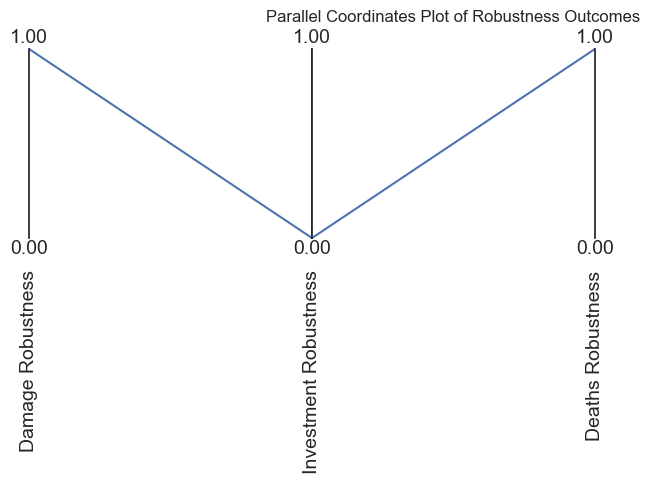

In [19]:
# Parallel coordinates plot for the outcomes
output = archive.loc[:, ['Damage Robustness', 'Investment Robustness', 'Deaths Robustness']]
limits = parcoords.get_limits(output)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

fig = plt.figure(figsize=(14, 6))
axes = parcoords.ParallelAxes(limits)
axes.plot(output)
plt.title('Parallel Coordinates Plot of Robustness Outcomes')
plt.show()

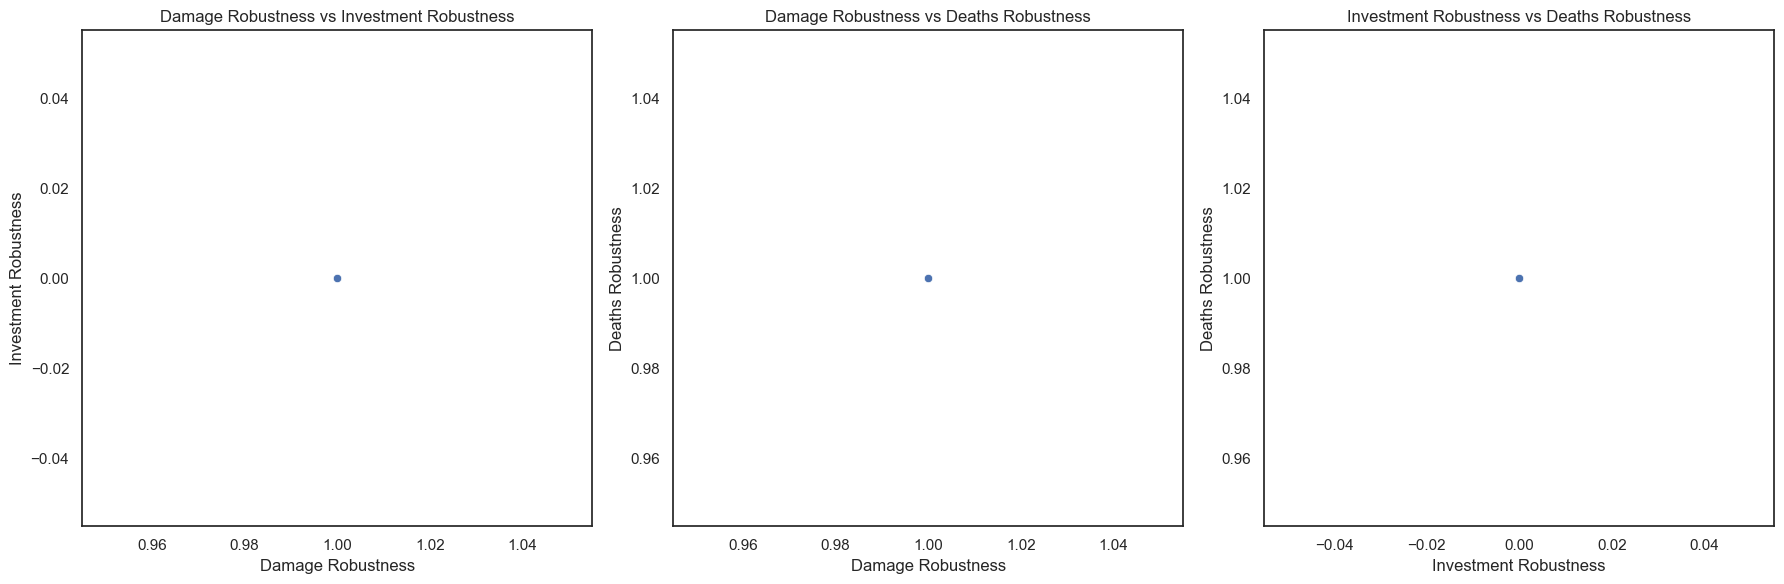

In [20]:
# Scatter plots for pairwise comparisons of the robustness metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=output, x='Damage Robustness', y='Investment Robustness', ax=axes[0])
axes[0].set_title('Damage Robustness vs Investment Robustness')

sns.scatterplot(data=output, x='Damage Robustness', y='Deaths Robustness', ax=axes[1])
axes[1].set_title('Damage Robustness vs Deaths Robustness')

sns.scatterplot(data=output, x='Investment Robustness', y='Deaths Robustness', ax=axes[2])
axes[2].set_title('Investment Robustness vs Deaths Robustness')

plt.tight_layout()
plt.show()

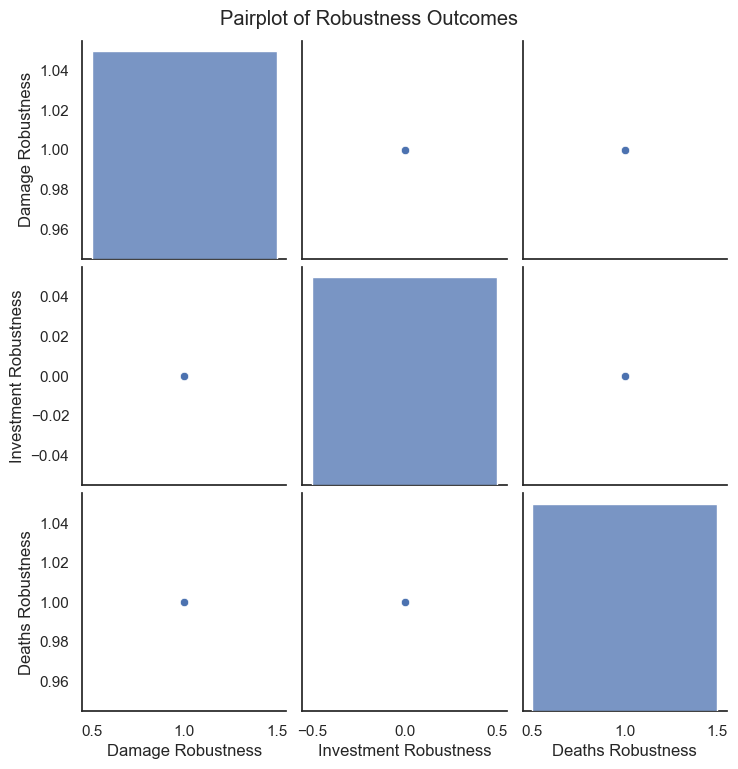

In [21]:
# Pairplot for a more detailed pairwise comparison
sns.pairplot(output)
plt.suptitle('Pairplot of Robustness Outcomes', y=1.02)
plt.show()

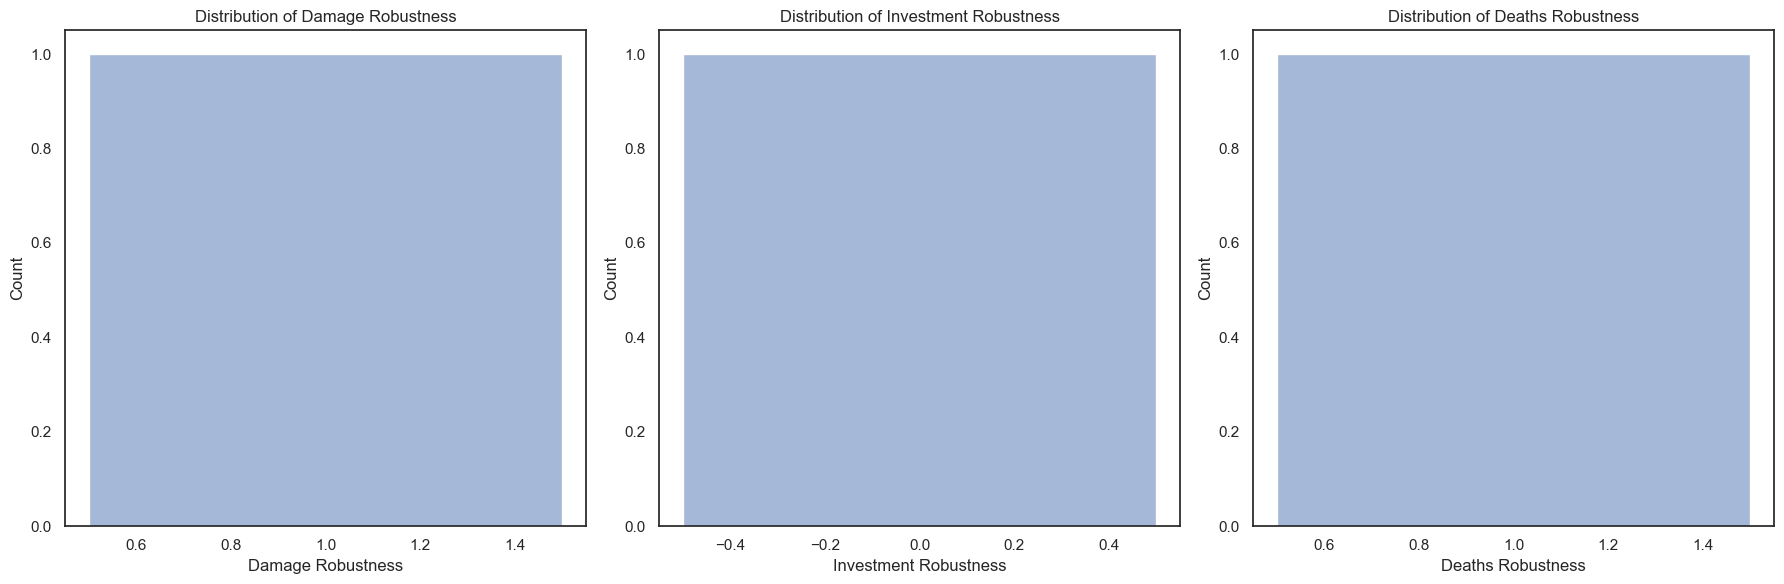

In [22]:
# Histograms of the robustness metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(output['Damage Robustness'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Damage Robustness')

sns.histplot(output['Investment Robustness'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Investment Robustness')

sns.histplot(output['Deaths Robustness'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Deaths Robustness')

plt.tight_layout()
plt.show()

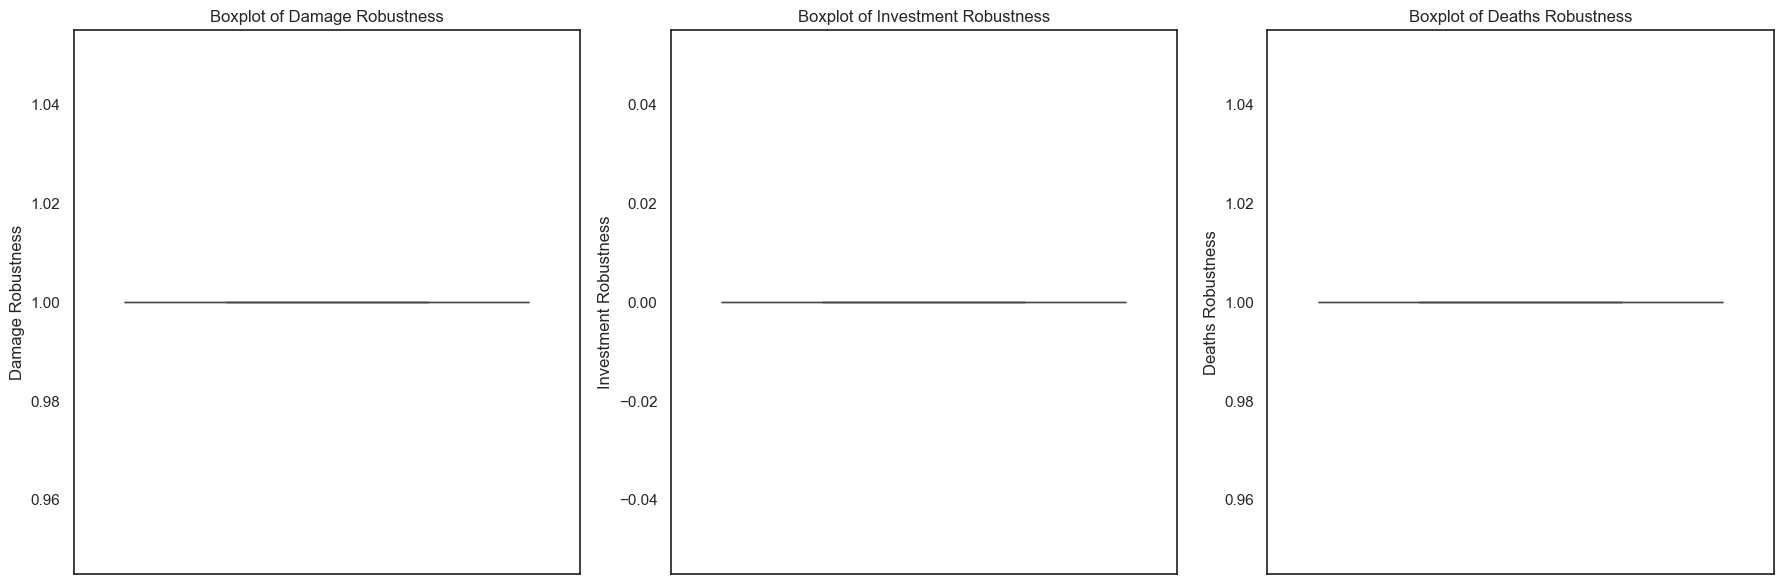

In [23]:
# Box plots to analyze the distribution of robustness metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=output['Damage Robustness'], ax=axes[0])
axes[0].set_title('Boxplot of Damage Robustness')

sns.boxplot(y=output['Investment Robustness'], ax=axes[1])
axes[1].set_title('Boxplot of Investment Robustness')

sns.boxplot(y=output['Deaths Robustness'], ax=axes[2])
axes[2].set_title('Boxplot of Deaths Robustness')

plt.tight_layout()
plt.show()


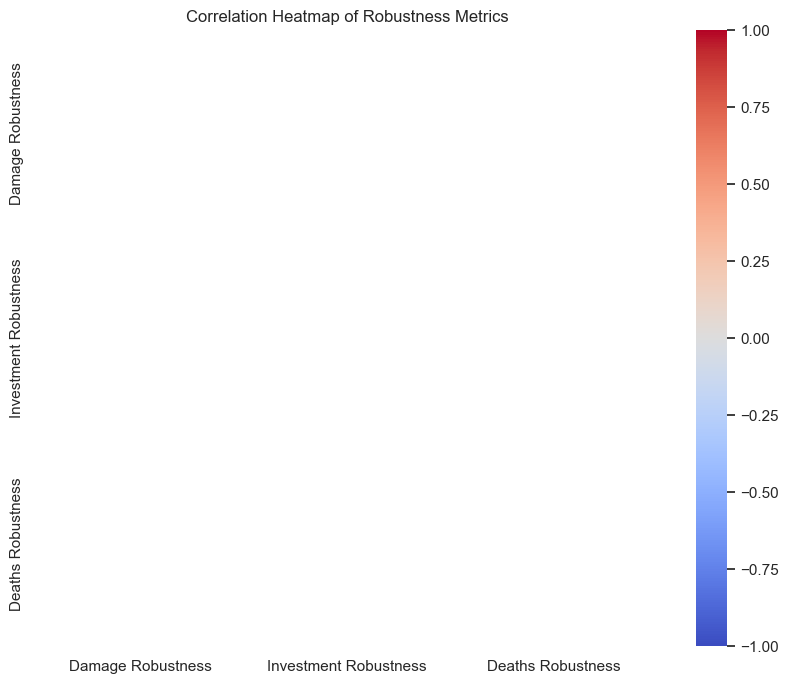

In [24]:
# Correlation heatmap to see relationships between metrics
correlation = output.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Robustness Metrics')
plt.show()


In [25]:
high_robustness_policies = output[(output['Damage Robustness'] > 0.8) &
                                  (output['Investment Robustness'] > 0.8) &
                                  (output['Deaths Robustness'] > 0.8)]

print("Number of high robustness policies:", len(high_robustness_policies))
print(high_robustness_policies.describe())

Number of high robustness policies: 0
       Damage Robustness  Investment Robustness  Deaths Robustness
count                0.0                    0.0                0.0
mean                 NaN                    NaN                NaN
std                  NaN                    NaN                NaN
min                  NaN                    NaN                NaN
25%                  NaN                    NaN                NaN
50%                  NaN                    NaN                NaN
75%                  NaN                    NaN                NaN
max                  NaN                    NaN                NaN


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by MinMaxScaler.

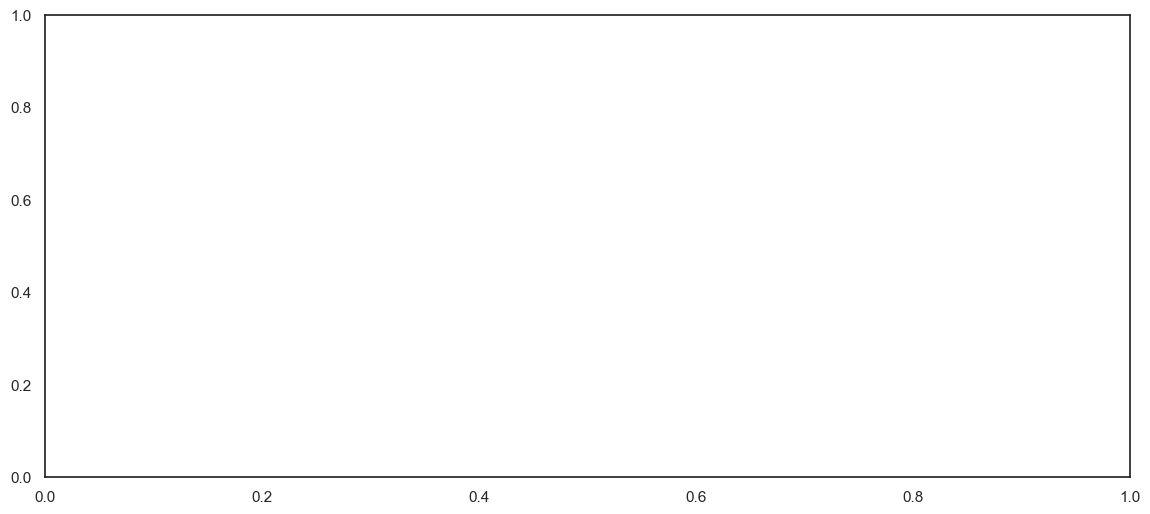

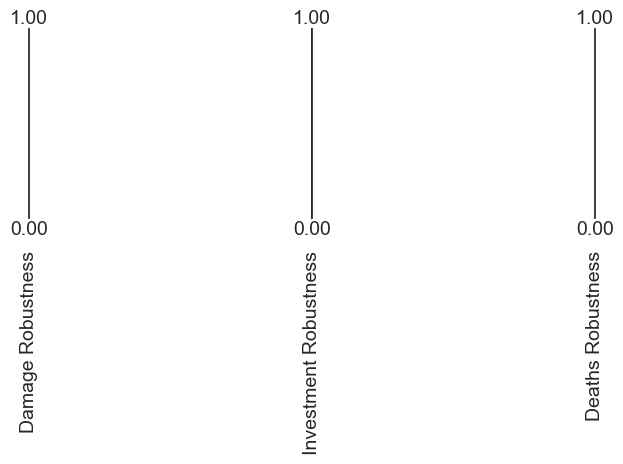

In [26]:
# Parallel coordinates plot for high robustness policies
fig, ax = plt.subplots(figsize=(14, 6))
axes = parcoords.ParallelAxes(limits)
axes.plot(high_robustness_policies)
axes.invert_axis('Damage Robustness')  # Assuming lower values are better for Damage
plt.title('Parallel Coordinates Plot of High Robustness Policies')
plt.show()